In [ ]:
# import neccessary libraries

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# ignore warnings

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import the dataset

telecomdf=pd.read_csv("/content/drive/MyDrive/telecom_churn_data.csv")

In [ ]:
# display the dataset

telecomdf.head()

mobile_number  circle_id  loc_og_t2o_mou  std_og_t2o_mou  loc_ic_t2o_mou  \
0     7000842753        109             0.0             0.0             0.0   
1     7001865778        109             0.0             0.0             0.0   
2     7001625959        109             0.0             0.0             0.0   
3     7001204172        109             0.0             0.0             0.0   
4     7000142493        109             0.0             0.0             0.0   

  last_date_of_month_6 last_date_of_month_7 last_date_of_month_8  \
0            6/30/2014            7/31/2014            8/31/2014   
1            6/30/2014            7/31/2014            8/31/2014   
2            6/30/2014            7/31/2014            8/31/2014   
3            6/30/2014            7/31/2014            8/31/2014   
4            6/30/2014            7/31/2014            8/31/2014   

  last_date_of_month_9   arpu_6  ...  sachet_3g_9  fb_user_6  fb_user_7  \
0            9/30/2014  197.385  ...            0        1.0        1.0   
1            9/30/2014   34.047  ...            0        NaN        1.0   
2            9/30/2014  167.690  ...            0        NaN        NaN   
3            9/30/2014  221.338  ...            0        NaN        NaN   
4            9/30/2014  261.636  ...            0        0.0        NaN   

   fb_user_8  fb_user_9   aon  aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  
0        1.0        NaN   968        30.4         0.0      101.20        3.58  
1        1.0        NaN  1006         0.0         0.0        0.00        0.00  
2        NaN        1.0  1103         0.0         0.0        4.17        0.00  
3        NaN        NaN  2491         0.0         0.0        0.00        0.00  
4        NaN        NaN  1526         0.0         0.0        0.00        0.00  

[5 rows x 226 columns]

In [ ]:
# shape of the dataset

telecomdf.shape

(99999, 226)

In [ ]:
# create columns list by types of columns
id_cols = ['mobile_number', 'circle_id']

date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9','date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9','date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9']

cat_cols =  ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9','fb_user_6','fb_user_7','fb_user_8','fb_user_9']

num_cols = [column for column in telecomdf.columns if column not in id_cols + date_cols + cat_cols]

In [ ]:
# Checkng missing values in the dataset

((telecomdf.isnull().sum()/telecomdf.shape[0])*100).round(2).sort_values(ascending=False)

arpu_3g_6            74.85
night_pck_user_6     74.85
total_rech_data_6    74.85
arpu_2g_6            74.85
max_rech_data_6      74.85
                     ...  
max_rech_amt_7        0.00
max_rech_amt_6        0.00
total_rech_amt_9      0.00
total_rech_amt_8      0.00
sep_vbc_3g            0.00
Length: 226, dtype: float64

In [ ]:
# let's see describtion of some recharge columns

recharge_cols = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_2g_9',
'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'count_rech_3g_9',
'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9',
'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',]

telecomdf[recharge_cols].describe(include='all')

total_rech_data_6  total_rech_data_7  total_rech_data_8  \
count       25153.000000       25571.000000       26339.000000   
mean            2.463802           2.666419           2.651999   
std             2.789128           3.031593           3.074987   
min             1.000000           1.000000           1.000000   
25%             1.000000           1.000000           1.000000   
50%             1.000000           1.000000           1.000000   
75%             3.000000           3.000000           3.000000   
max            61.000000          54.000000          60.000000   

       total_rech_data_9  count_rech_2g_6  count_rech_2g_7  count_rech_2g_8  \
count       25922.000000     25153.000000     25571.000000     26339.000000   
mean            2.441170         1.864668         2.044699         2.016288   
std             2.516339         2.570254         2.768332         2.720132   
min             1.000000         0.000000         0.000000         0.000000   
25%             1.000000         1.000000         1.000000         1.000000   
50%             2.000000         1.000000         1.000000         1.000000   
75%             3.000000         2.000000         2.000000         2.000000   
max            84.000000        42.000000        48.000000        44.000000   

       count_rech_2g_9  count_rech_3g_6  count_rech_3g_7  count_rech_3g_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          1.781807         0.599133         0.621720         0.635711   
std           2.214701         1.274428         1.394524         1.422827   
min           0.000000         0.000000         0.000000         0.000000   
25%           1.000000         0.000000         0.000000         0.000000   
50%           1.000000         0.000000         0.000000         0.000000   
75%           2.000000         1.000000         1.000000         1.000000   
max          40.000000        29.000000        35.000000        45.000000   

       count_rech_3g_9  max_rech_data_6  max_rech_data_7  max_rech_data_8  \
count     25922.000000     25153.000000     25571.000000     26339.000000   
mean          0.659363       126.393392       126.729459       125.717301   
std           1.411513       108.477235       109.765267       109.437851   
min           0.000000         1.000000         1.000000         1.000000   
25%           0.000000        25.000000        25.000000        25.000000   
50%           0.000000       145.000000       145.000000       145.000000   
75%           1.000000       177.000000       177.000000       179.000000   
max          49.000000      1555.000000      1555.000000      1555.000000   

       max_rech_data_9  av_rech_amt_data_6  av_rech_amt_data_7  \
count      25922.00000        25153.000000        25571.000000   
mean         124.94144          192.600982          200.981292   
std          111.36376          192.646318          196.791224   
min            1.00000            1.000000            0.500000   
25%           25.00000           82.000000           92.000000   
50%          145.00000          154.000000          154.000000   
75%          179.00000          252.000000          252.000000   
max         1555.00000         7546.000000         4365.000000   

       av_rech_amt_data_8  av_rech_amt_data_9  
count        26339.000000        25922.000000  
mean           197.526489          192.734315  
std            191.301305          188.400286  
min              0.500000            1.000000  
25%             87.000000           69.000000  
50%            154.000000          164.000000  
75%            252.000000          252.000000  
max           4076.000000         4061.000000

In [ ]:
# It is also observed that the recharge date and the recharge value are missing together which means the customer did not recharge

# In the recharge columns where minumum value is 1, we can impute missing values with 0 since this means customer did not recharge

# create a list of recharge columns where we will impute missing values with zeroes

zero_impute = ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'total_rech_data_9',
        'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'av_rech_amt_data_9',
        'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'max_rech_data_9']

telecomdf[zero_impute] = telecomdf[zero_impute].apply(lambda x: x.fillna(0))

In [ ]:
# we can get rid of id and date columns as it is not useful to us

telecomdf.drop(id_cols,axis=1,inplace=True)
telecomdf.drop(date_cols,axis=1,inplace=True)

In [ ]:
# replace missing values with '-1' in categorical columns

telecomdf[cat_cols] = telecomdf[cat_cols].apply(lambda x: x.fillna(-1))

In [ ]:
# Drop columns with more than 30% of missing values

cols = telecomdf.columns
missing_percnt = telecomdf.isnull().sum() * 100 / len(telecomdf)
telecom_null_df = pd.DataFrame({'col_name': cols,'perc_null': missing_percnt})

drop_cols = telecom_null_df.loc[(telecom_null_df["col_name"].str.contains('_9')==False) & (telecom_null_df["perc_null"] > 30.0)]["col_name"]

telecomdf.drop(drop_cols, axis=1,inplace = True)
telecomdf.shape

(99999, 200)

In [ ]:
# Checking the columns with no varience and drop such columns
novarience_cols=[]
for i in telecomdf.columns:
    if telecomdf[i].nunique() == 1:
        novarience_cols.append(i)
        telecomdf.drop(i,axis=1, inplace = True)
    else:
        pass

telecomdf.shape

(99999, 189)

In [ ]:
telecomdf=pd.DataFrame(telecomdf)
telecomdf=pd.DataFrame(telecomdf,columns=telecomdf.columns)

In [ ]:
# introducing a new column total_rech_data_amt_ which can be calculated as av_rech_amt_data_ * total_rech_data_

telecomdf['total_rech_data_amt_6']=telecomdf['av_rech_amt_data_6']*telecomdf['total_rech_data_6']
telecomdf['total_rech_data_amt_7']=telecomdf['av_rech_amt_data_7']*telecomdf['total_rech_data_7']
telecomdf['total_rech_data_amt_8']=telecomdf['av_rech_amt_data_8']*telecomdf['total_rech_data_8']
telecomdf['total_rech_data_amt_9']=telecomdf['av_rech_amt_data_9']*telecomdf['total_rech_data_9']

In [ ]:
# As we will not need columns av_rech_amt_data_,total_rech_data_ , lets drop them

telecomdf.drop(['total_rech_data_6','total_rech_data_7','total_rech_data_8','total_rech_data_9','av_rech_amt_data_6','av_rech_amt_data_7','av_rech_amt_data_8','av_rech_amt_data_9'],axis = 1,inplace = True)

In [ ]:
# finding out the average recharge done in the first two months

telecom_av_rech_6_7 = (telecomdf['total_rech_amt_6']+ telecomdf['total_rech_amt_7']+telecomdf['total_rech_data_amt_6']+telecomdf['total_rech_data_amt_7'])/2

In [ ]:
# finding 70 percentile of the calculated average amount

percentage_70_6_7 = np.percentile(telecom_av_rech_6_7, 70.0)
print("70 percentile is : ", percentage_70_6_7)

70 percentile is :  478.0


In [ ]:
# keep only those customers who have recharged their mobiles with more than or equal to 70th percentile amount

telecom_hvc = telecomdf[telecom_av_rech_6_7 >= percentage_70_6_7]

In [ ]:
# Checking shape of the dataset after hvc filteration

telecom_hvc.shape

(30001, 185)

In [ ]:
# lets introduce a new column "churn", values would be either 1 (churn) or 0 (non-churn)
# we will calculate churn/non-churn based on the usage

telecom_hvc['churn'] = np.where(telecom_hvc[['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']].sum(axis=1) == 0, 1,0)
telecom_hvc.head()

arpu_6    arpu_7    arpu_8   arpu_9  onnet_mou_6  onnet_mou_7  \
0    197.385   214.816   213.803   21.100          NaN          NaN   
7   1069.180  1349.850  3171.480  500.000        57.84        54.68   
8    378.721   492.223   137.362  166.787       413.69       351.03   
21   514.453   597.753   637.760  578.596       102.41       132.11   
23    74.350   193.897   366.966  811.480        48.96        50.66   

    onnet_mou_8  onnet_mou_9  offnet_mou_6  offnet_mou_7  ...  aon  \
0          0.00          NaN           NaN           NaN  ...  968   
7         52.29          NaN        453.43        567.16  ...  802   
8         35.08        33.46         94.66         80.63  ...  315   
21        85.14       161.63        757.93        896.68  ...  720   
23        33.58        15.74         85.41         89.36  ...  604   

    aug_vbc_3g  jul_vbc_3g  jun_vbc_3g  sep_vbc_3g  total_rech_data_amt_6  \
0        30.40        0.00      101.20        3.58                  252.0   
7        57.74       19.38       18.74        0.00                    0.0   
8        21.03      910.65      122.16        0.00                    0.0   
21        0.00        0.00        0.00        0.00                    0.0   
23       40.45       51.86        0.00        0.00                    0.0   

    total_rech_data_amt_7  total_rech_data_amt_8  total_rech_data_amt_9  churn  
0                   252.0                  252.0                    0.0      1  
7                     0.0                    0.0                    0.0      1  
8                   354.0                  207.0                    0.0      0  
21                    0.0                    0.0                    0.0      0  
23                  712.0                  540.0                  252.0      0  

[5 rows x 186 columns]

In [ ]:
col_end9=telecom_hvc.columns[telecom_hvc.columns.str.endswith(pat='_9')]

telecom_hvc.drop(col_end9,axis=1,inplace=True)

In [ ]:
# convert churn column's datatype to category
telecom_hvc['churn'] = telecom_hvc['churn'].astype("category")

In [ ]:
# lets find out churn/non churn percentage

telecom_hvc['churn'].value_counts()/len(telecom_hvc)*100

0    91.863605
1     8.136395
Name: churn, dtype: float64

In [ ]:
# Calculate difference between 8th and previous months

telecom_hvc['arpu_diff'] = telecom_hvc.arpu_8 - ((telecom_hvc.arpu_6 + telecom_hvc.arpu_7)/2)
telecom_hvc['onnet_mou_diff'] = telecom_hvc.onnet_mou_8 - ((telecom_hvc.onnet_mou_6 + telecom_hvc.onnet_mou_7)/2)
telecom_hvc['offnet_mou_diff'] = telecom_hvc.offnet_mou_8 - ((telecom_hvc.offnet_mou_6 + telecom_hvc.offnet_mou_7)/2)
telecom_hvc['roam_ic_mou_diff'] = telecom_hvc.roam_ic_mou_8 - ((telecom_hvc.roam_ic_mou_6 + telecom_hvc.roam_ic_mou_7)/2)
telecom_hvc['roam_og_mou_diff'] = telecom_hvc.roam_og_mou_8 - ((telecom_hvc.roam_og_mou_6 + telecom_hvc.roam_og_mou_7)/2)
telecom_hvc['loc_og_mou_diff'] = telecom_hvc.loc_og_mou_8 - ((telecom_hvc.loc_og_mou_6 + telecom_hvc.loc_og_mou_7)/2)
telecom_hvc['loc_ic_mou_diff'] = telecom_hvc.loc_ic_mou_8 - ((telecom_hvc.loc_ic_mou_6 + telecom_hvc.loc_ic_mou_7)/2)
telecom_hvc['std_og_mou_diff'] = telecom_hvc.std_og_mou_8 - ((telecom_hvc.std_og_mou_6 + telecom_hvc.std_og_mou_7)/2)
telecom_hvc['std_ic_mou_diff'] = telecom_hvc.std_ic_mou_8 - ((telecom_hvc.std_ic_mou_6 + telecom_hvc.std_ic_mou_7)/2)
telecom_hvc['isd_og_mou_diff'] = telecom_hvc.isd_og_mou_8 - ((telecom_hvc.isd_og_mou_6 + telecom_hvc.isd_og_mou_7)/2)
telecom_hvc['isd_ic_mou_diff'] = telecom_hvc.isd_ic_mou_8 - ((telecom_hvc.isd_ic_mou_6 + telecom_hvc.isd_ic_mou_7)/2)
telecom_hvc['spl_og_mou_diff'] = telecom_hvc.spl_og_mou_8 - ((telecom_hvc.spl_og_mou_6 + telecom_hvc.spl_og_mou_7)/2)
telecom_hvc['spl_ic_mou_diff'] = telecom_hvc.spl_ic_mou_8 - ((telecom_hvc.spl_ic_mou_6 + telecom_hvc.spl_ic_mou_7)/2)
telecom_hvc['total_og_mou_diff'] = telecom_hvc.total_og_mou_8 - ((telecom_hvc.total_og_mou_6 + telecom_hvc.total_og_mou_7)/2)
telecom_hvc['total_ic_mou_diff'] = telecom_hvc.total_ic_mou_8 - ((telecom_hvc.total_ic_mou_6 + telecom_hvc.total_ic_mou_7)/2)
telecom_hvc['total_rech_amt_diff'] = telecom_hvc.total_rech_amt_8 - ((telecom_hvc.total_rech_amt_6 + telecom_hvc.total_rech_amt_7)/2)
telecom_hvc['max_rech_data_diff'] = telecom_hvc.max_rech_data_8 - ((telecom_hvc.max_rech_data_6 + telecom_hvc.max_rech_data_7)/2)
telecom_hvc['vol_2g_mb_diff'] = telecom_hvc.vol_2g_mb_8 - ((telecom_hvc.vol_2g_mb_6 + telecom_hvc.vol_2g_mb_7)/2)
telecom_hvc['vol_3g_mb_diff'] = telecom_hvc.vol_3g_mb_8 - ((telecom_hvc.vol_3g_mb_6 + telecom_hvc.vol_3g_mb_7)/2)

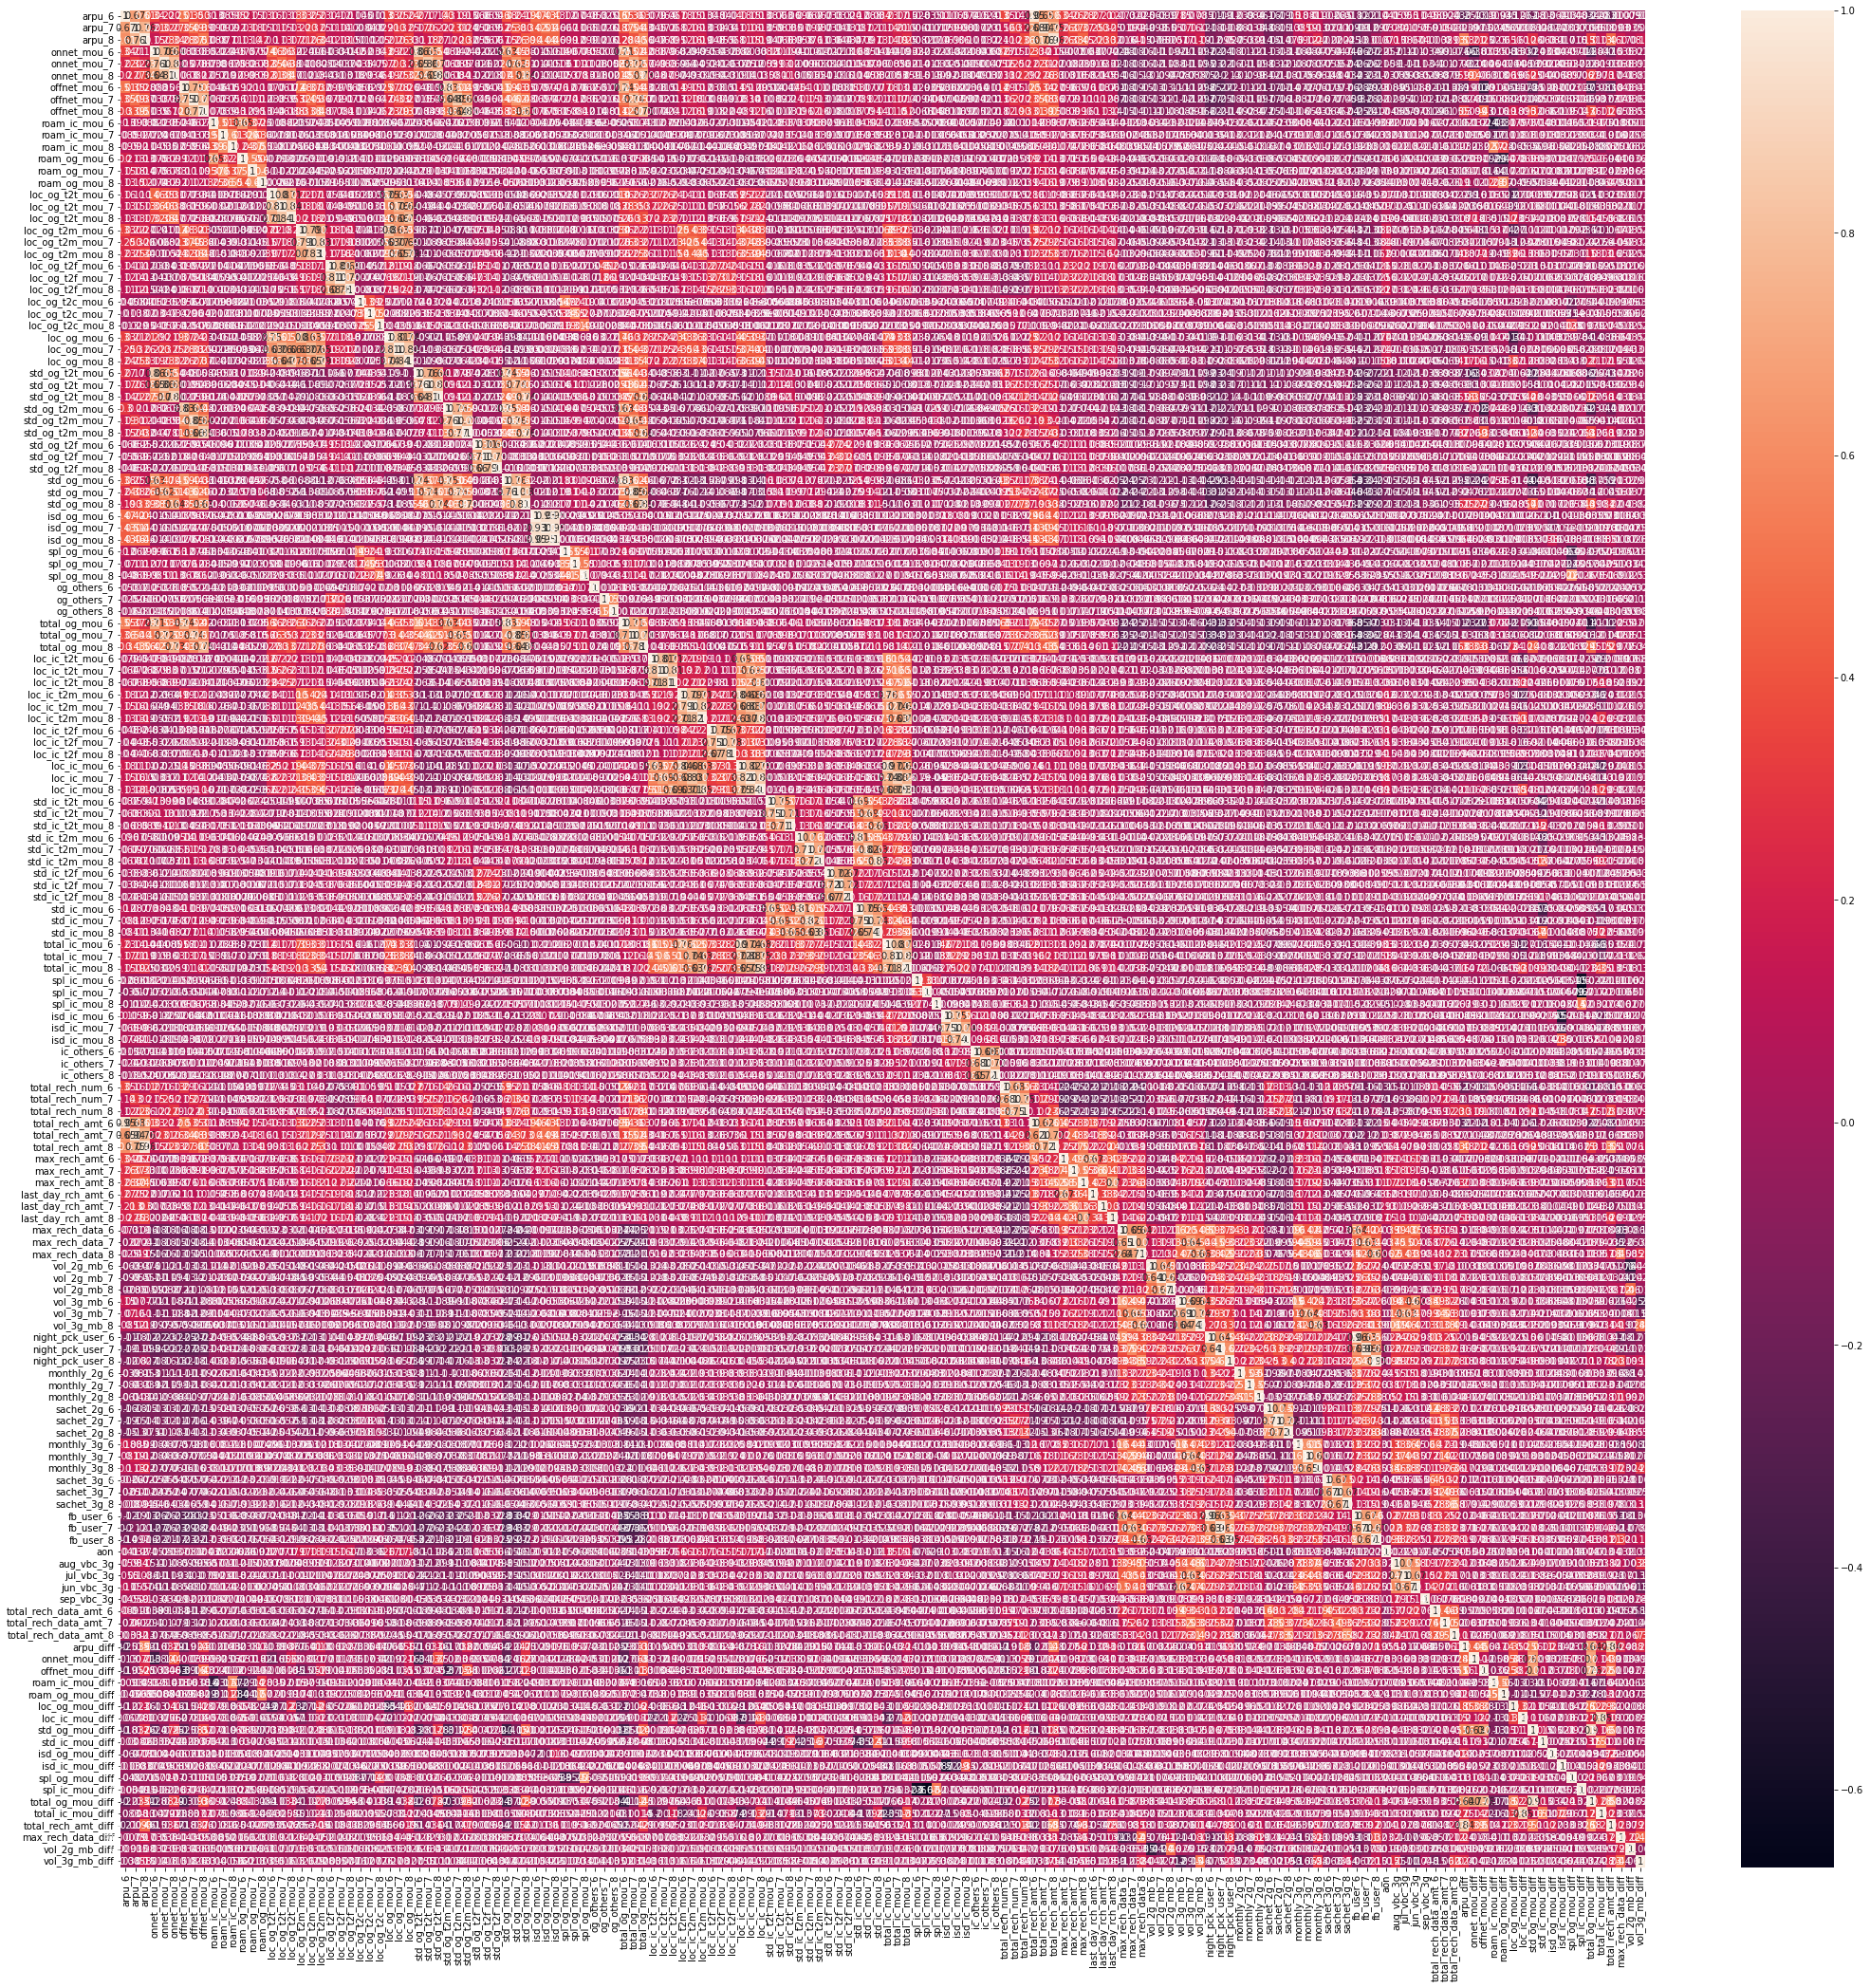

In [ ]:
corr = telecom_hvc.corr()

fig = plt.figure(figsize=(36,36))
sns.heatmap(corr,xticklabels=corr.columns, yticklabels=corr.columns,annot=True)
plt.show()

In [ ]:
sns.boxplot(x = telecom_hvc.churn, y = telecom_hvc.total_ic_mou_8)
plt.show()

In [ ]:
sns.boxplot(x = telecom_hvc.churn, y = telecom_hvc.total_og_mou_8)
plt.show()

In [ ]:
sns.boxplot(x = telecom_hvc.churn, y = telecom_hvc.total_rech_amt_8)
plt.show()

In [ ]:
sns.boxplot(x = telecom_hvc.churn, y = telecom_hvc.last_day_rch_amt_6)
plt.show()

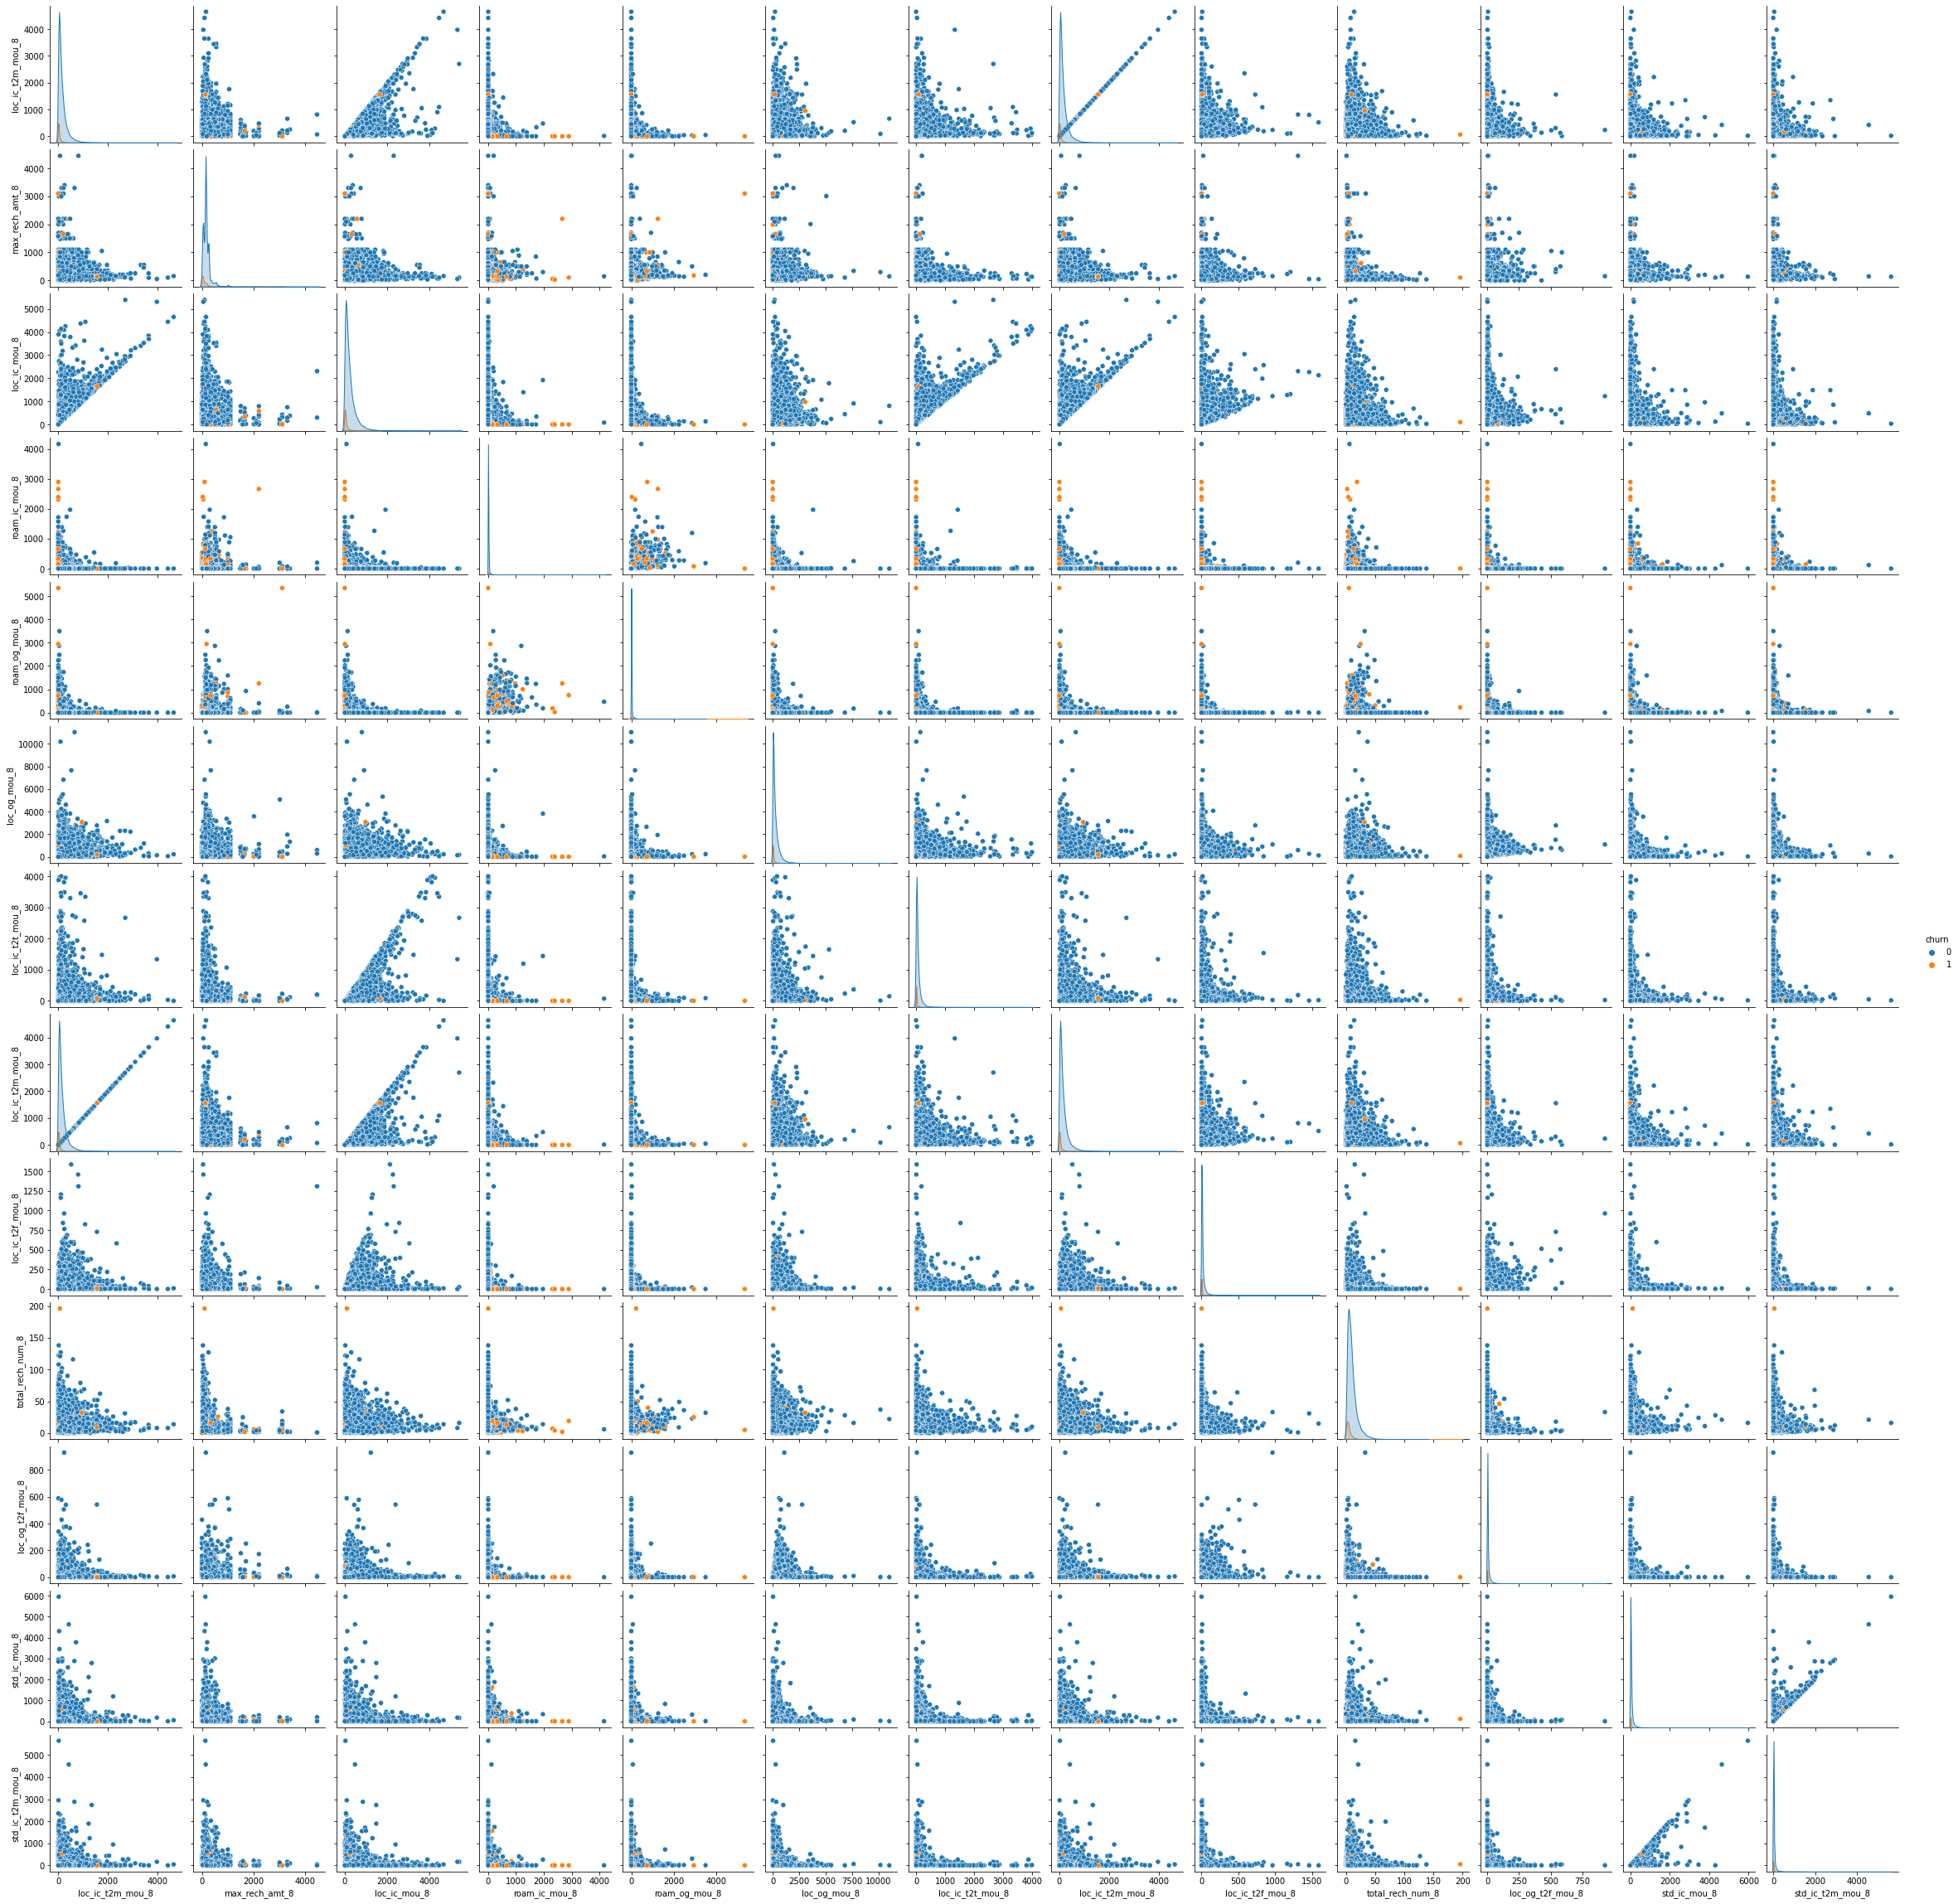

In [151]:
sns.pairplot(telecom_hvc,vars=['loc_ic_t2m_mou_8', 'max_rech_amt_8', 'loc_ic_mou_8', 'roam_ic_mou_8', 'roam_og_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'total_rech_num_8', 'loc_og_t2f_mou_8', 'std_ic_mou_8', 'std_ic_t2m_mou_8'], hue='churn')   
plt.show()

In [166]:
# we will create a new dataset for model building

df = telecom_hvc[:].copy()
df.info()
df.dropna(inplace=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Columns: 157 entries, arpu_6 to vol_3g_mb_diff
dtypes: category(1), float64(131), int64(25)
memory usage: 36.0 MB


In [167]:
# lets create X & y dataset for model building

X = df.drop(['churn'], axis=1)
y = df['churn']

df.drop('churn', axis=1, inplace=True)

In [168]:
# split the dateset into train and test datasets

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=99)
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("Y_train:", Y_train.shape)
print("Y_test:", Y_test.shape)

X_train: (19952, 156)
X_test: (8552, 156)
Y_train: (19952,)
Y_test: (8552,)


In [169]:
# apply scaling on the dataset

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)


scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)

In [170]:
# Let's manage imbalance using Smote

from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42, sampling_strategy=0.6)
X_tr,Y_tr = sm.fit_resample(X_train,Y_train.ravel())

In [172]:
print("Dimension of X_tr Shape:", X_tr.shape)
print("Dimension of y_tr Shape:", Y_tr.shape)

Dimension of X_tr Shape: (30164, 156)
Dimension of y_tr Shape: (30164,)


In [173]:
#Import PCA
from sklearn.decomposition import PCA

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X_tr)
X_pca.shape

(30164, 50)

In [174]:
#Import PCA
from sklearn.decomposition import IncrementalPCA

pca = IncrementalPCA(n_components=35)
X_pca = pca.fit_transform(X_tr)
X_pca.shape

(30164, 35)

In [175]:
# Model Building
# 1. Logistic Regression

from sklearn.linear_model import LogisticRegression
from sklearn import linear_model

logr = linear_model.LogisticRegression(class_weight='balanced')
logr.fit(X_tr,Y_tr)

LogisticRegression(class_weight='balanced')

In [176]:
from sklearn.metrics import classification_report, confusion_matrix

confusion_matrix(Y_tr, logr.predict(X_tr))

array([[15219,  3634],
       [ 1813,  9498]])

In [177]:
print(classification_report(Y_tr, logr.predict(X_tr)))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85     18853
           1       0.72      0.84      0.78     11311

    accuracy                           0.82     30164
   macro avg       0.81      0.82      0.81     30164
weighted avg       0.83      0.82      0.82     30164



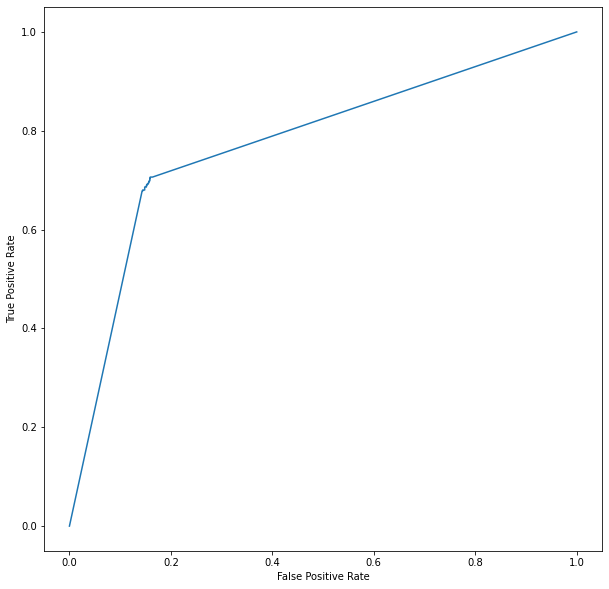

In [178]:
from sklearn import metrics

y_pred_proba = logr.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [179]:
# Random forest

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rf = RandomForestClassifier()
param_grid = {'max_depth': range(10, 30, 5)}
grid_search = GridSearchCV(estimator = rf,
                           param_grid=param_grid,
                           scoring='accuracy', 
                           n_jobs=-1,
                           cv = 5, 
                           return_train_score=True)

# Fit the model
grid_search.fit(X_tr, Y_tr)

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(10, 30, 5)},
             return_train_score=True, scoring='accuracy')

In [180]:
grid_search.best_score_

0.9582284833943813

In [181]:
rf_best = grid_search.best_estimator_
rf_best

RandomForestClassifier(max_depth=25)

In [182]:
y_train_pred = rf_best.predict(X_tr)
y_test_pred = rf_best.predict(X_test)

# Print the report
print(metrics.classification_report(Y_test, y_test_pred))

              precision    recall  f1-score   support

           0       0.94      1.00      0.97      8055
           1       0.42      0.01      0.02       497

    accuracy                           0.94      8552
   macro avg       0.68      0.50      0.49      8552
weighted avg       0.91      0.94      0.91      8552



In [183]:
max_features = int(round(np.sqrt(X_tr.shape[1])))
print(max_features)

rf_model = RandomForestClassifier(n_estimators=100, max_features=max_features, class_weight={0:0.1, 1: 0.9}, oob_score=True, random_state=4, verbose=1)

12


In [184]:
rf_model.fit(X_tr, Y_tr)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:  1.1min finished


RandomForestClassifier(class_weight={0: 0.1, 1: 0.9}, max_features=12,
                       oob_score=True, random_state=4, verbose=1)

In [187]:
# OOB score
rf_model.oob_score_

0.959355523140167

In [185]:
# predict churn on test data
y_pred = rf_model.predict(X_test)

# create onfusion matrix
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[8055    0]
 [ 497    0]]


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.2s finished


In [186]:
# predictors
features = df.columns

# feature_importance
importance = rf_model.feature_importances_

# create dataframe
feature_importance = pd.DataFrame({'variables': features, 'importance_percentage': importance*100})
feature_importance = feature_importance[['variables', 'importance_percentage']]

# sort features
feature_importance = feature_importance.sort_values('importance_percentage', ascending=False).reset_index(drop=True)
print("Sum of importance=", feature_importance.importance_percentage.sum())
feature_importance

Sum of importance= 100.0


variables  importance_percentage
0          roam_ic_mou_8               6.441335
1          roam_og_mou_8               4.579610
2     last_day_rch_amt_8               3.373058
3           loc_ic_mou_8               3.019540
4    total_rech_amt_diff               2.473501
..                   ...                    ...
151            fb_user_7               0.057096
152     night_pck_user_7               0.046816
153     night_pck_user_6               0.043902
154          og_others_7               0.011696
155          og_others_8               0.009571

[156 rows x 2 columns]

In [190]:
# extract top 'n' features
# Top Predictors
top_n = 12
top_features = feature_importance.variables[0:top_n]

print(top_features)

0           roam_ic_mou_8
1           roam_og_mou_8
2      last_day_rch_amt_8
3            loc_ic_mou_8
4     total_rech_amt_diff
5         loc_ic_mou_diff
6        loc_ic_t2m_mou_8
7          total_ic_mou_8
8               arpu_diff
9        roam_ic_mou_diff
10      total_ic_mou_diff
11       roam_og_mou_diff
Name: variables, dtype: object


1.   Telecom company needs to pay attention to the roaming rates. They need to provide good offers to the customers who are using services from a roaming zone.
2.   The company needs to focus on the STD and ISD rates. Perhaps, the rates are too high. Provide them with some kind of STD and ISD packages.